In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import numpy as np
from scipy.stats import bootstrap

In [3]:
## Functions. put this in a separate file later. 
def hdf5_to_dict(path): 
    _dict = {}
    with h5py.File(path) as HDF5_file:
        for key in HDF5_file.keys():
            _dict[key] = np.array(HDF5_file[key])
    return _dict

<b>Load data</b>

In [24]:
path = 'C:/Users/Michael Forsthofer/OneDrive - University of Sussex/BadenLab/2p-imaging/St52/'
cluster_file = '2024-7-16_x240716_1_s4.h5'

data = hdf5_to_dict(path + cluster_file)



In [25]:
from sys import getsizeof 
for i in data.keys():
    print(i)
    print(getsizeof(data[i]))




Averages0
35869088
OS_Parameters
404
ROIs
1310848
Stack_Ave
1310848
Traces0_raw
346784
Traces0_znorm
346784
Triggertimes
472
Triggertimes_Frame
1368
Triggervalues
472
correlation_projection
1310848
wParamsNum
352
wParamsStr
248


<b>Group clusters based on IGOr processes</b>

In [44]:
cluster_allocations = data['Cluster_Allocations0']
cluster_means = data['Cluster_Means0']
average_traces = data['Averages0']
raw_traces = data['Snippets0']
time = data['SnippetsTimes0']
time = time[:,:,:]-time[0,:,:]

<b>Plot things</b>

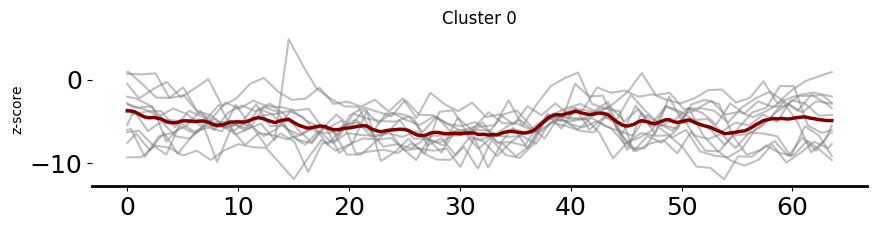

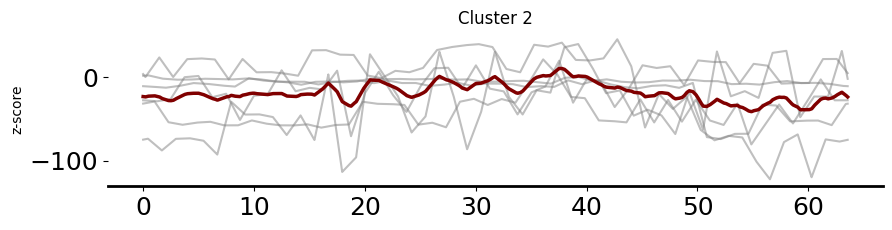

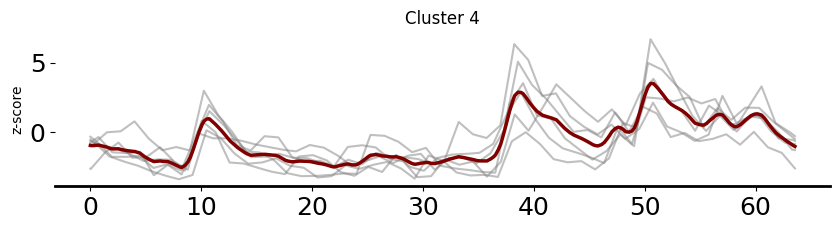

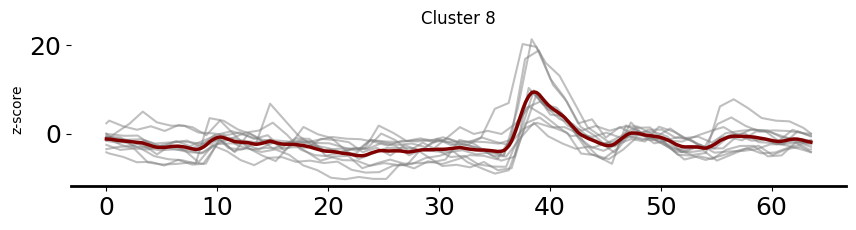

In [54]:
clusters_to_plot = [0, 2, 4, 8]
#cluster_colors = ['red', 'blue', 'green', 'purple']
#clusters_to_plot = [0]
for cur_cluster in clusters_to_plot:   
    fig, ax = plt.subplots(figsize = (10, 2))
    cluster_locs = np.where(cluster_allocations == cur_cluster)[0]
  
    cur_traces = []
    for i in cluster_locs:
       cur_traces.append(np.vstack(raw_traces[:,:,i]))
    ax.plot(time[:,1,i], np.hstack(cur_traces), color = 'grey', alpha=0.5)
   #  stacked_traces = (np.hstack(cur_traces).transpose(),)
   #  boot_CI = bootstrap(stacked_traces, np.mean, confidence_level = 0.95, random_state=1, method='percentile')
   #  ax.fill_between(time[:,1,i], boot_CI.confidence_interval.low, boot_CI.confidence_interval.high, color='darksalmon', alpha=0.2)
    ax.plot(time[:,1,i], cluster_means[:-1,cur_cluster], color = 'maroon', linewidth=2.5)
    ax.set_title('Cluster {}'.format(cur_cluster))
    ax.set_ylabel('z-score')
    axe = plt.gca()  # Get the current axis
    axe.spines['top'].set_visible(False)
    axe.spines['right'].set_visible(False)

    axe.spines['left'].set_visible(False)
    axe.spines['bottom'].set_visible(True)
    axe.spines['left'].set_linewidth(2)
    axe.spines['bottom'].set_linewidth(2)
    axe.spines['bottom'].set_linewidth(2) 
    axe.tick_params(axis='both', which='major', labelsize=18)
    #axe.set_ylim(np.nanmean(cluster_means[:-1,cur_cluster])-4, np.nanmean(cluster_means[:-1,cur_cluster])+6)
    fig.savefig('SMP_x240716_1_s4_cluster_{}.png'.format(cur_cluster), format='png', bbox_inches='tight')

C:\Users\Michael Forsthofer\AppData\Local\Temp\ipykernel_23540\3753233638.py:16: RuntimeWarning: divide by zero encountered in divide
  radius = 1 * -l_v/(time-looming_dot_exp)


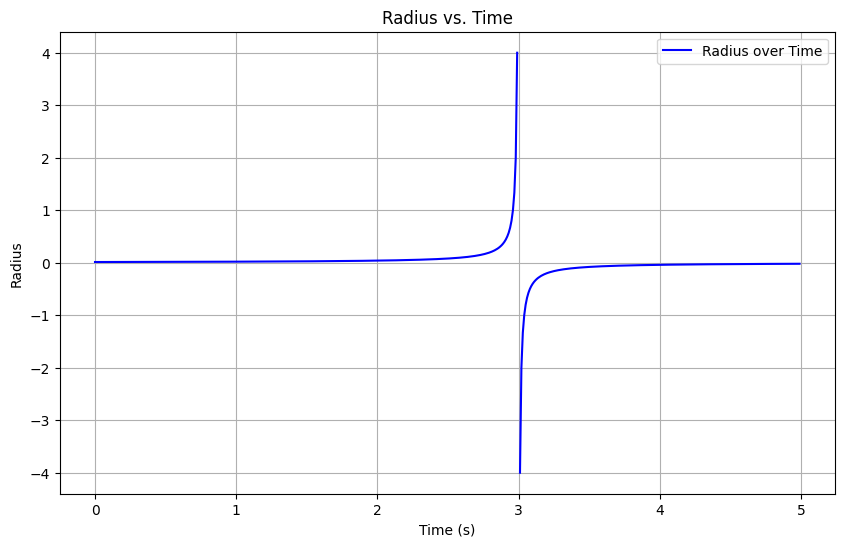

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the C formula for radius is something like:
# radius = initial_radius * exp(-decay_rate * time) + constant

# Define the parameters (you can adjust these based on your C code)
initial_radius = 1  # example value for initial radius
l_v = 0.04       # example value for decay rate
looming_dot_exp = 3         # example value for the constant

# Create a time vector from 0 to 5 with 0.01 increments
time = np.arange(0, 5, 0.01)

# Calculate the radius using the formula
radius = 1 * -l_v/(time-looming_dot_exp)

# Plot the radius over time
plt.figure(figsize=(10, 6))
plt.plot(time, radius, label='Radius over Time', color='blue')
plt.title('Radius vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Radius')
plt.grid(True)
plt.legend()
plt.show()